### CNN Training in Time Domain

Define basic data parameters:
- **QTD_OF_SUMMARIES**: Represent the number of files wich will be used on training
- **QTD_OF_TEST_SUMMARIES**: Represents the number of files wich will be used on test
- **NR_EPOCHS**: The number of epochs on training
- **BATCH_SIZE**: The batch size used on training

In [1]:
QTD_OF_SUMMARIES = 30
QTD_OF_TEST_SUMMARIES = 5
NR_EPOCHS = 150
BATCH_SIZE = 150

Load anomalous summaries from database

In [2]:
import datautils.loader.data_loader as loader
summaries = loader.load_anomalous_summaries()

In [3]:
#import random
#random.shuffle(summaries)

Pre-process:
- Load time data in windows of 0.5 seconds
- Split in train and validation data
- Balance the data
- Show's it's shape

In [ ]:
import datautils.loader.data_loader as loader
loader.load_time_segmented_data(summaries[:QTD_OF_SUMMARIES])

In [5]:
import datautils.splitter.time_splitter as splitter
X_train, X_val, y_train, y_val = splitter.segmented_time_data_splitter(summaries[:QTD_OF_SUMMARIES])

In [6]:
import datautils.balancer.data_balancer as balancer
X_train, y_train = balancer.balance(X_train, y_train)
X_val, y_val = balancer.balance(X_val, y_val)

In [7]:
X_train.shape

(710, 19, 1280)

Load CNN model

In [8]:
import ia.model.cnn as ia
time_cnn = ia.TimeCNN(input_shape=(X_train[0].shape))

In [9]:
time_cnn.compile()

In [10]:
history = time_cnn.fit(X_train, y_train, num_epochs=NR_EPOCHS, batch_size=BATCH_SIZE, val_data=X_val, val_labels=y_val)

Epoch 1/150
5/5 [==============================] - 1s 59ms/step - loss: 0.6932 - accuracy: 0.4915 - val_loss: 0.6931 - val_accuracy: 0.5000
Epoch 2/150
5/5 [==============================] - 0s 23ms/step - loss: 0.6932 - accuracy: 0.4803 - val_loss: 0.6931 - val_accuracy: 0.5000
Epoch 3/150
5/5 [==============================] - 0s 23ms/step - loss: 0.6932 - accuracy: 0.5000 - val_loss: 0.6931 - val_accuracy: 0.5000
Epoch 4/150
5/5 [==============================] - 0s 23ms/step - loss: 0.6932 - accuracy: 0.5000 - val_loss: 0.6931 - val_accuracy: 0.5000
Epoch 5/150
5/5 [==============================] - 0s 22ms/step - loss: 0.6932 - accuracy: 0.5000 - val_loss: 0.6931 - val_accuracy: 0.5000
Epoch 6/150
5/5 [==============================] - 0s 21ms/step - loss: 0.6931 - accuracy: 0.5000 - val_loss: 0.6931 - val_accuracy: 0.5000
Epoch 7/150
5/5 [==============================] - 0s 22ms/step - loss: 0.6932 - accuracy: 0.5000 - val_loss: 0.6931 - val_accuracy: 0.5000
Epoch 8/150
5/5 [===

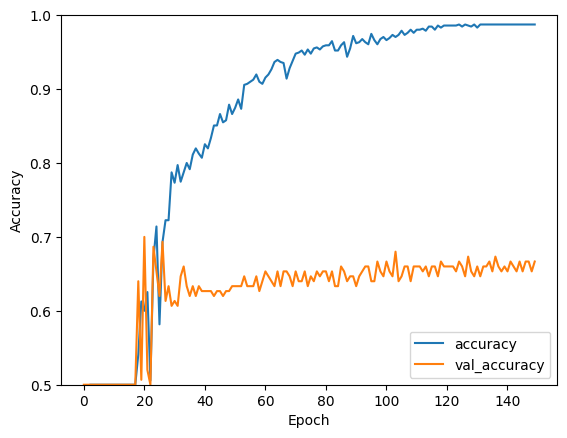

In [11]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')

In [12]:
time_cnn.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d (Conv1D)             (None, 17, 32)            122912    
                                                                 
 max_pooling1d (MaxPooling1  (None, 5, 32)             0         
 D)                                                              
                                                                 
 conv1d_1 (Conv1D)           (None, 3, 64)             6208      
                                                                 
 max_pooling1d_1 (MaxPoolin  (None, 1, 64)             0         
 g1D)                                                            
                                                                 
 flatten (Flatten)           (None, 64)                0         
                                                                 
 dense (Dense)               (None, 128)               8

In [ ]:
import datautils.loader.data_loader as loader
loader.load_time_segmented_data(summaries[QTD_OF_SUMMARIES + 1 : QTD_OF_SUMMARIES + 1 + QTD_OF_TEST_SUMMARIES])

In [14]:
import datautils.splitter.time_splitter as splitter
X_test, _, y_test, _ = splitter.segmented_time_data_splitter(summaries[QTD_OF_SUMMARIES + 1 : QTD_OF_SUMMARIES + 1 + QTD_OF_TEST_SUMMARIES])

import datautils.balancer.data_balancer as balancer
X_test, y_test = balancer.balance(X_test, y_test)

In [19]:
import numpy as np
predictions = time_cnn.model.predict(X_test)
predictions = np.array([prediction > 0.5 for prediction in predictions])

for i in range(len(y_test)):
    print("PREDICTION: " + str(predictions[i]) + " | " +  "REAL: " + str(y_test[i]))

8/8 [==============================] - 0s 1ms/step
PREDICTION: [False] | REAL: False
PREDICTION: [False] | REAL: False
PREDICTION: [False] | REAL: False
PREDICTION: [False] | REAL: False
PREDICTION: [ True] | REAL: False
PREDICTION: [False] | REAL: False
PREDICTION: [ True] | REAL: False
PREDICTION: [False] | REAL: False
PREDICTION: [ True] | REAL: False
PREDICTION: [False] | REAL: False
PREDICTION: [False] | REAL: False
PREDICTION: [False] | REAL: False
PREDICTION: [False] | REAL: False
PREDICTION: [False] | REAL: False
PREDICTION: [False] | REAL: False
PREDICTION: [False] | REAL: False
PREDICTION: [ True] | REAL: False
PREDICTION: [ True] | REAL: False
PREDICTION: [False] | REAL: False
PREDICTION: [False] | REAL: False
PREDICTION: [False] | REAL: False
PREDICTION: [False] | REAL: False
PREDICTION: [False] | REAL: False
PREDICTION: [False] | REAL: False
PREDICTION: [ True] | REAL: False
PREDICTION: [False] | REAL: False
PREDICTION: [ True] | REAL: False
PREDICTION: [False] | REAL: Fal

In [16]:
test_loss, test_acc = time_cnn.model.evaluate(X_test, y_test)
print(f'Test accuracy: {test_acc}')
print(f'Test loss: {test_loss}')

8/8 [==============================] - 0s 2ms/step - loss: 0.7142 - accuracy: 0.8042
Test accuracy: 0.8041666746139526
Test loss: 0.7142388224601746


### Metrics:

In [17]:
import ia.metrics.metrics_generator as met
met.Metrics(y_test, predictions).all_metrics()

True Positives: 107
True Negatives: 86
False Positives: 13
False Negatives: 34
Total Samples: 240
Accuracy: 0.8041666666666667
Precision: 0.8916666666666667
Sensitivity: 0.7588652482269503
Specificity: 0.8686868686868687
TPR: 0.8916666666666667
FPR: 0.13131313131313133
F1-Score: 0.7808594710075057


ROC curve

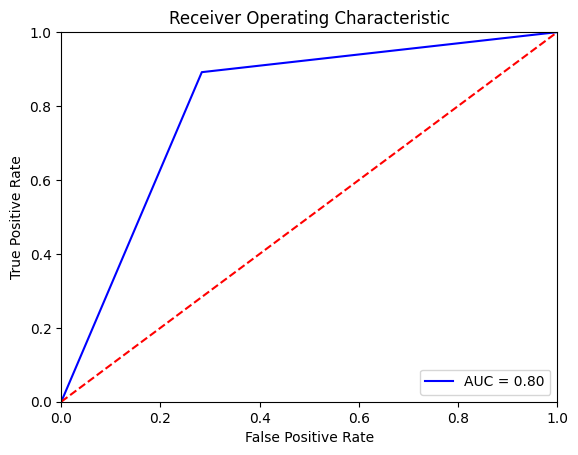

In [18]:
import sklearn.metrics as metrics
import matplotlib.pyplot as plt

fpr, tpr, threshold = metrics.roc_curve(y_test, predictions)
roc_auc = metrics.auc(fpr, tpr)

plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()